#Step 1: Set up the environment
First, let's start by setting up Google Colab and importing the necessary libraries.

In [1]:
# Mounting Google Drive in Colab (optional, if you have relevant files on your Drive)
# from google.colab import drive
# drive.mount('/content/drive')

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sms
from sklearn import tree


# Step 2: Load and preprocess the dataset

In [2]:
# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 3: Train the Naive Bayes model

In [3]:
# Initialize the model
nb = GaussianNB()

# Train the model
nb.fit(X_train, y_train)


GaussianNB()

# Step 4: Make predictions and evaluate the model

In [4]:
# Predictions
y_pred = nb.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification Report
report = classification_report(y_test, y_pred, target_names=data.target_names)
print("\nClassification Report:")
print(report)


Accuracy: 97.37%

Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.93      0.96        43
      benign       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



##Decision Tree

In [5]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

##Plot the Confusion Matrix

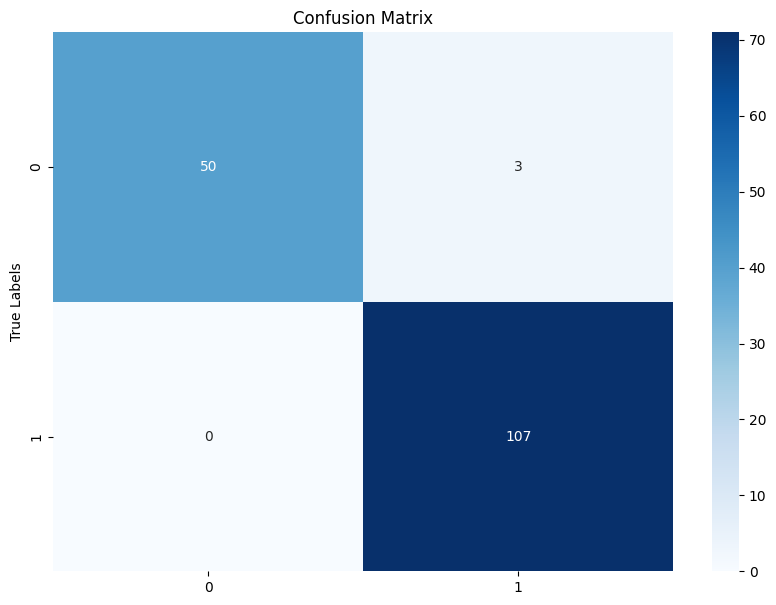

In [6]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix

conf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,7))
sms.heatmap(conf_matrix, annot=True, fmt="o", cmap="Blues")
plt.ylabel('Predictied Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Initialize the model
nb = GaussianNB()

# Cross-validation
cv_scores = cross_val_score(nb, X, y, cv=5) # 10-fold cross-validation
avg_cv_score = np.mean(cv_scores)
max_cv_score = np.max(cv_scores)

print(f"Average Cross-Validation Accuracy: {avg_cv_score * 100:.2f}%")
print(f"Maximum Cross-Validation Accuracy: {max_cv_score * 100:.2f}%")

# Train the model on the entire dataset for evaluation
nb.fit(X, y)

# Predictions on the entire dataset
y_pred = nb.predict(X)

# Accuracy
accuracy = accuracy_score(y, y_pred)
print(f"\nAccuracy on Entire Dataset: {accuracy * 100:.2f}%")

# Classification Report
report = classification_report(y, y_pred, target_names=data.target_names)
print("\nClassification Report:")
print(report)


Average Cross-Validation Accuracy: 93.85%
Maximum Cross-Validation Accuracy: 95.58%

Accuracy on Entire Dataset: 94.20%

Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.89      0.92       212
      benign       0.94      0.97      0.95       357

    accuracy                           0.94       569
   macro avg       0.94      0.93      0.94       569
weighted avg       0.94      0.94      0.94       569



In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Initialize the model
nb = GaussianNB()

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)
max_accuracy = 0
best_model = None

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_model = nb

print(f"Best Cross-Validation Accuracy: {max_accuracy * 100:.2f}%")

# Save the best model
filename = 'best_naive_bayes_model.pkl'
joblib.dump(best_model, filename)
print(f"Best model saved as {filename}")

# Predictions on the entire dataset using the best model
y_pred = best_model.predict(X)

# Accuracy
accuracy = accuracy_score(y, y_pred)
print(f"\nAccuracy on Entire Dataset using Best Model: {accuracy * 100:.2f}%")

# Classification Report
report = classification_report(y, y_pred, target_names=data.target_names)
print("\nClassification Report:")
print(report)


Best Cross-Validation Accuracy: 97.37%
Best model saved as best_naive_bayes_model.pkl

Accuracy on Entire Dataset using Best Model: 94.38%

Classification Report:
              precision    recall  f1-score   support

   malignant       0.96      0.89      0.92       212
      benign       0.94      0.98      0.96       357

    accuracy                           0.94       569
   macro avg       0.95      0.93      0.94       569
weighted avg       0.94      0.94      0.94       569



In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
nb = GaussianNB()

# Hyperparameters grid
# For GaussianNB, there's mainly the 'var_smoothing' parameter, which is a portion of the largest variance of all features added to variances for stability calculation.
params_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Set up GridSearchCV
grid_search = GridSearchCV(nb, params_grid, cv=5, verbose=1, n_jobs=-1)

# Train the model
grid_search.fit(X_train, y_train)

# Best hyperparameter
best_var_smoothing = grid_search.best_params_['var_smoothing']

# Initialize and train the model with the best hyperparameter
nb_best = GaussianNB(var_smoothing=best_var_smoothing)
nb_best.fit(X_train, y_train)

# Predictions
y_pred = nb_best.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with best hyperparameter (var_smoothing={best_var_smoothing:.2e}): {accuracy * 100:.2f}%")

# Classification Report
report = classification_report(y_test, y_pred, target_names=data.target_names)
print("\nClassification Report:")
print(report)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Accuracy with best hyperparameter (var_smoothing=2.31e-09): 96.49%

Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.91      0.95        43
      benign       0.95      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

